# Logistic Regression Text Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [2]:
nltk_stopw = stopwords.words('english')

In [3]:
df = pd.read_pickle("../../data/dreams_annotated_cleaned.pkl")
df["report_cleaned"] = df["report_cleaned"].apply(lambda x: x[0])
#df = df.sample(frac = 1)
df = df.query("emotion == 'CO D' or emotion == 'AN D' or emotion == 'SD D' or emotion == 'AP D' or emotion == 'HA D'")[["report_cleaned", "emotion"]]
df.head()

,report_cleaned,emotion
7,alone apartment old place inside build dark ma...,AP D
14,car people come downtown area place past lot t...,CO D
18,deliver house sit car look strange dragonfly l...,AP D
26,walk home little glass figure maybe little fin...,AP D
31,cat move one place another two somewhat awkwar...,HA D


In [4]:
df

,report_cleaned,emotion
7,alone apartment old place inside build dark ma...,AP D
14,car people come downtown area place past lot t...,CO D
18,deliver house sit car look strange dragonfly l...,AP D
26,walk home little glass figure maybe little fin...,AP D
31,cat move one place another two somewhat awkwar...,HA D
...,...,...
27927,beach foreign country walk tall sand dune hop ...,AP D
27928,foreign country front seat passenger car drive...,AP D
27933,cloudy day grassy field seat cockpit wwi bipla...,AP D
27935,young confident walk aisle large room fill wom...,AP D


## Preprocessing and visualization

Convert code to emotion class according to the annotation guideline : https://dreams.ucsc.edu/Coding/emotions.html

In [5]:
def to_emotion_class(emotion):
    
    if emotion == "AP D":
        return "fear"
    elif emotion == "CO D":
        return "confusion"
    elif emotion == "SD D":
        return "sadness"
    elif emotion == "AN D":
        return "anger"
    else:
        return "happiness"

df["emotion"] = df["emotion"].apply(lambda x: to_emotion_class(x))
df.head()

,report_cleaned,emotion
7,alone apartment old place inside build dark ma...,fear
14,car people come downtown area place past lot t...,confusion
18,deliver house sit car look strange dragonfly l...,fear
26,walk home little glass figure maybe little fin...,fear
31,cat move one place another two somewhat awkwar...,happiness


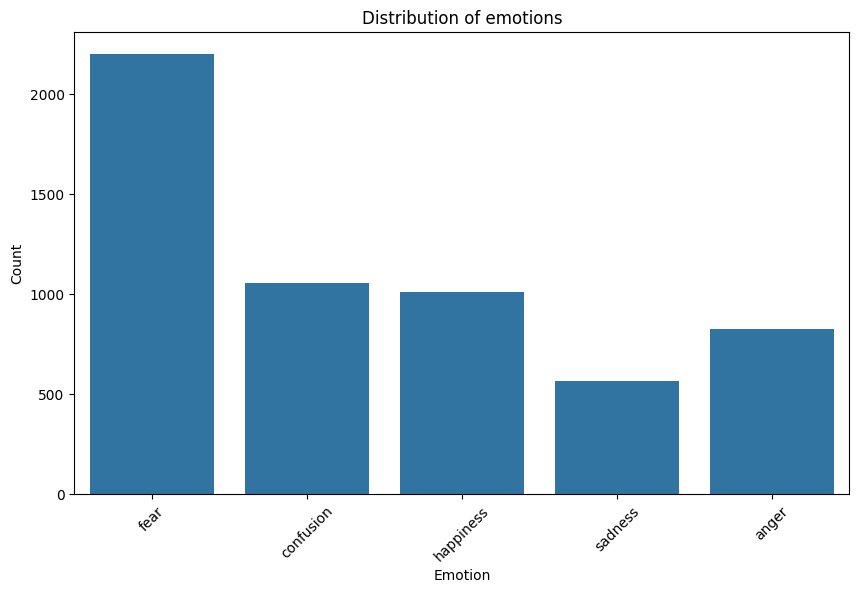

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df)

plt.title('Distribution of emotions') 
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

## Training and test sets

In [7]:
X = df['report_cleaned']
y = df['emotion']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training: Bag of Words (CountVectorizer) and Logistic Regression

Unigrams: All unique words in a document

BiGrams: All permutations of two consecutive words in a document

TriGrams: All permutations of three consecutive words in a document

In [9]:
model = make_pipeline(CountVectorizer(), LogisticRegression())

In [10]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Features dimension: {len(X_train), len(model[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Features dimension: (4520, 16572)
Classification Report:
               precision    recall  f1-score   support

       anger       0.73      0.64      0.68       158
   confusion       0.69      0.65      0.67       221
        fear       0.74      0.85      0.79       420
   happiness       0.71      0.68      0.69       216
     sadness       0.65      0.52      0.58       115

    accuracy                           0.71      1130
   macro avg       0.70      0.67      0.68      1130
weighted avg       0.71      0.71      0.71      1130



/Users/davideposillipo/Documents/Lavoro/UNIPD_NLP_course_April25/repo2/NLP_UniPD/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Plot confusion matrix

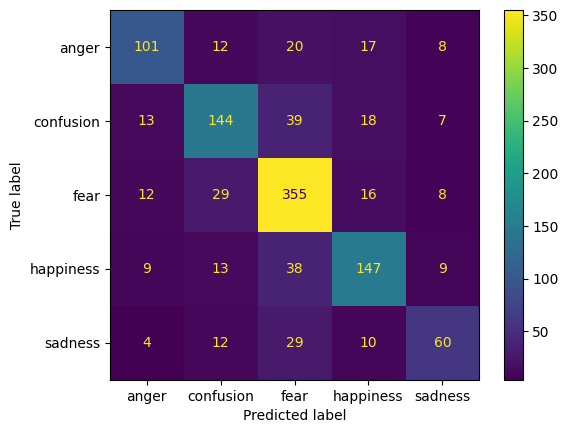

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

### Model variations

UniGram +BiGram features. This time our Bag-of-Words algorithm also considers consecutive pairs of words in the dictionary along with unique words. 

In [ ]:
model_2 = make_pipeline(CountVectorizer(ngram_range=(1,2)), LogisticRegression())

In [ ]:
model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

print(f"Features dimension: {len(X_train), len(model_2[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred_2))

Adding Tri-Gram features also into our feature set. This time we also consider three consecutive word permutations also into our vocabulary

In [ ]:
model_3 = make_pipeline(CountVectorizer(ngram_range=(1,3)), LogisticRegression())

In [ ]:
model_3.fit(X_train, y_train)

y_pred_3 = model_3.predict(X_test)

print(f"Features dimension: {len(X_train), len(model_3[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred_3))